In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn import preprocessing

In [2]:
warnings.simplefilter (action='ignore')
#plt.style.use('seaborn')


In [3]:
Data = pd.read_csv('Bank_Personal_Loan_Modelling.csv', encoding=('unicode-escape'))
Data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0,0


In [4]:
Df = pd.DataFrame(Data)
Df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0,0


In [12]:
#data proceesing phase
# data cleaning

Df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
Personal Loan         0
dtype: int64

In [14]:
#data exploratory analysis
Df.dropna()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0,0


In [15]:
Df.describe(include='all')

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.104400,0.06040,0.596800,0.294000,0.096000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.305809,0.23825,0.490589,0.455637,0.294621
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.00000,1.000000,1.000000,0.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [17]:
#finding any negative values in data frame and replcaing them

any(Df['Experience'] < 0)


True

In [18]:
print (pd.unique(Df['Experience']))

[ 1 19 15  9  8 13 27 24 10 39  5 23 32 41 30 14 18 21 28 31 11 16 20 35
  6 25  7 12 26 37 17  2 36 29  3 22 -1 34  0 38 40 33  4 -2 42 -3 43]


In [19]:
###replcaing the negavive values in experience column with the average of experience value

Exp_med = Df.loc[: , 'Experience'].median()
print ('The average of experience is:' , Exp_med)

Df.loc[:, 'Experience'].replace([-1, -2, -3], [Exp_med, Exp_med, Exp_med], inplace=True)
Df

The average of experience is: 20.0


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0,0


In [20]:
any(Df['Experience'] < 0)


False

In [21]:
Df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.327600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.104400,0.06040,0.596800,0.294000,0.096000
std,1443.520003,11.463166,11.253035,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.305809,0.23825,0.490589,0.455637,0.294621
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,1250.750000,35.000000,11.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.00000,1.000000,1.000000,0.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [74]:
from ydata_profiling import ProfileReport
profile = ProfileReport(Df)

profile.to_file('./output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [22]:
Df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0,0


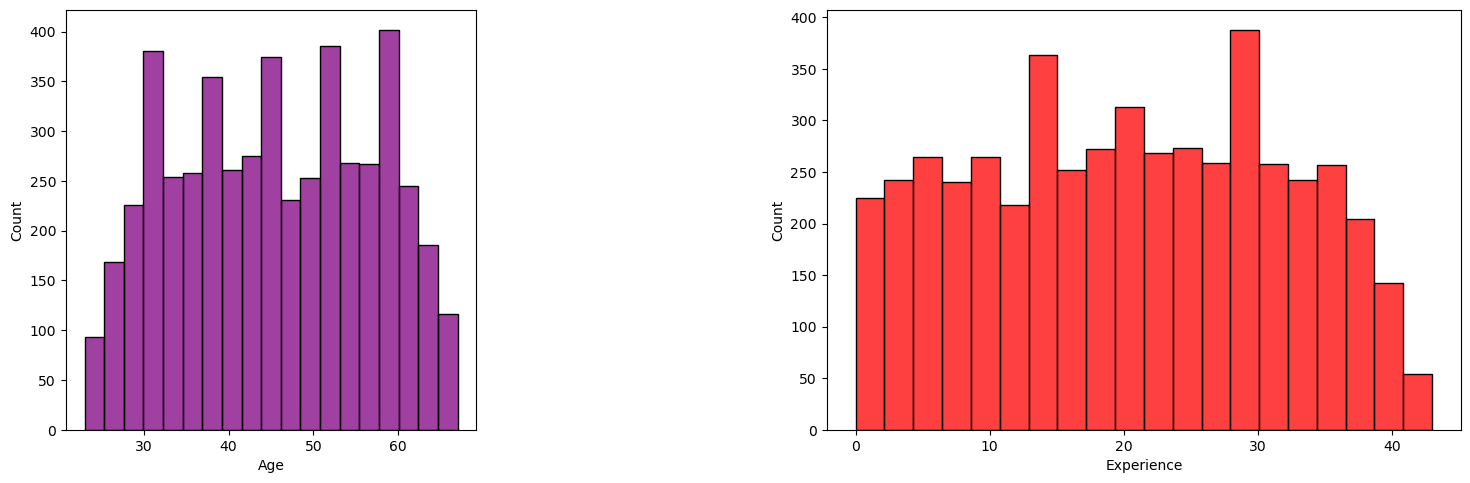

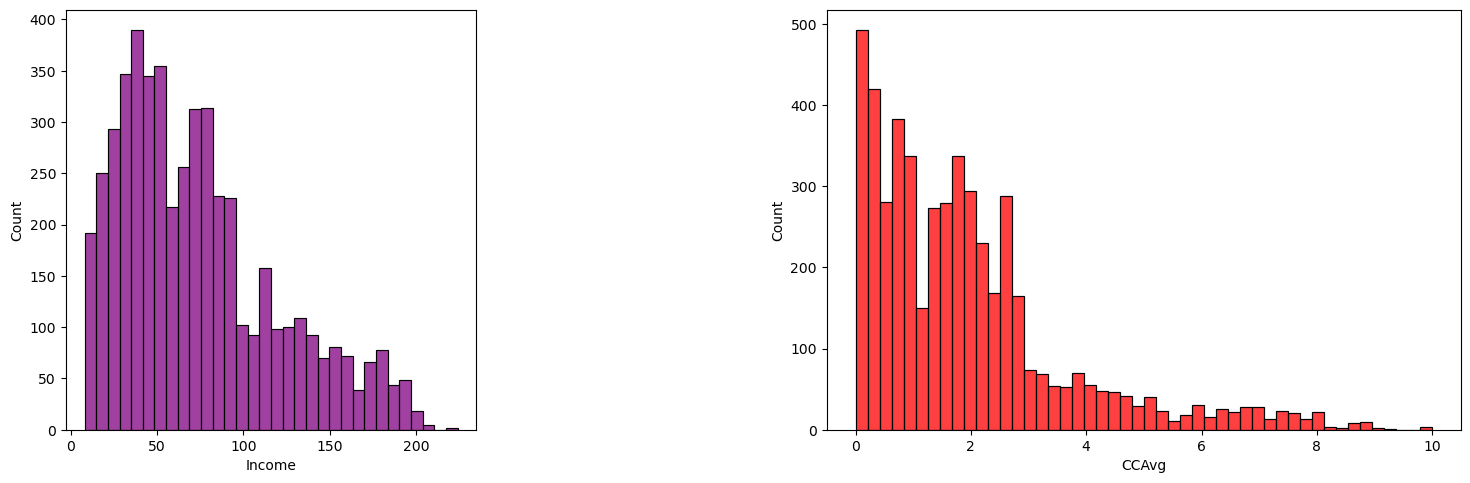

IndexError: list index out of range

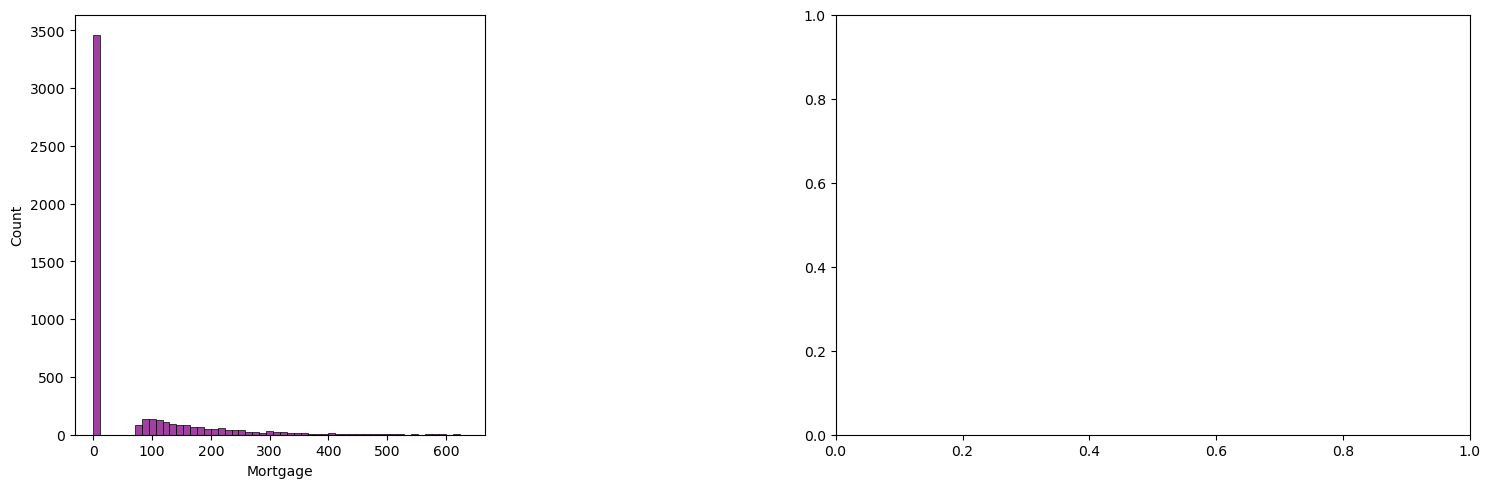

In [23]:
Numerical = ['Age','Experience', 'Income','CCAvg','Mortgage']
i = 0
while i <5:
    fig = plt.figure(figsize=(18, 12))
    plt.subplot(2,3,1)
    sns.histplot(x =Numerical [i], color='purple', data= Df)
    i = i+1
    plt.subplot(2,2,2)
    sns.histplot(x =Numerical [i], color='red', data= Df)
    i = i +1
    plt.show()

In [ ]:
Numerical = ['Age','Experience', 'Income','CCAvg','Mortgage']
i = 0
while i <5:
    fig = plt.figure(figsize=(18, 12))
    plt.subplot(2,3,1)
    sns.boxplot(x =Numerical [i], color='purple', data= Df)
    i = i+1
    plt.subplot(2,2,2)
    sns.boxplot(x =Numerical [i], color='red', data= Df)
    i = i +1
    plt.show()

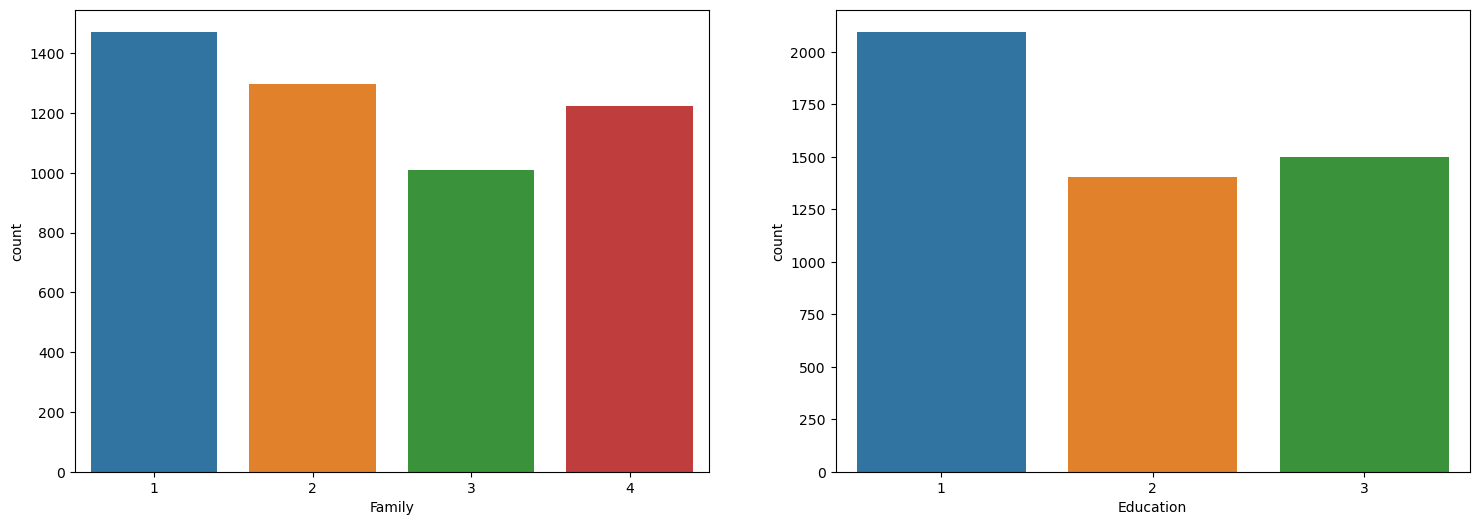

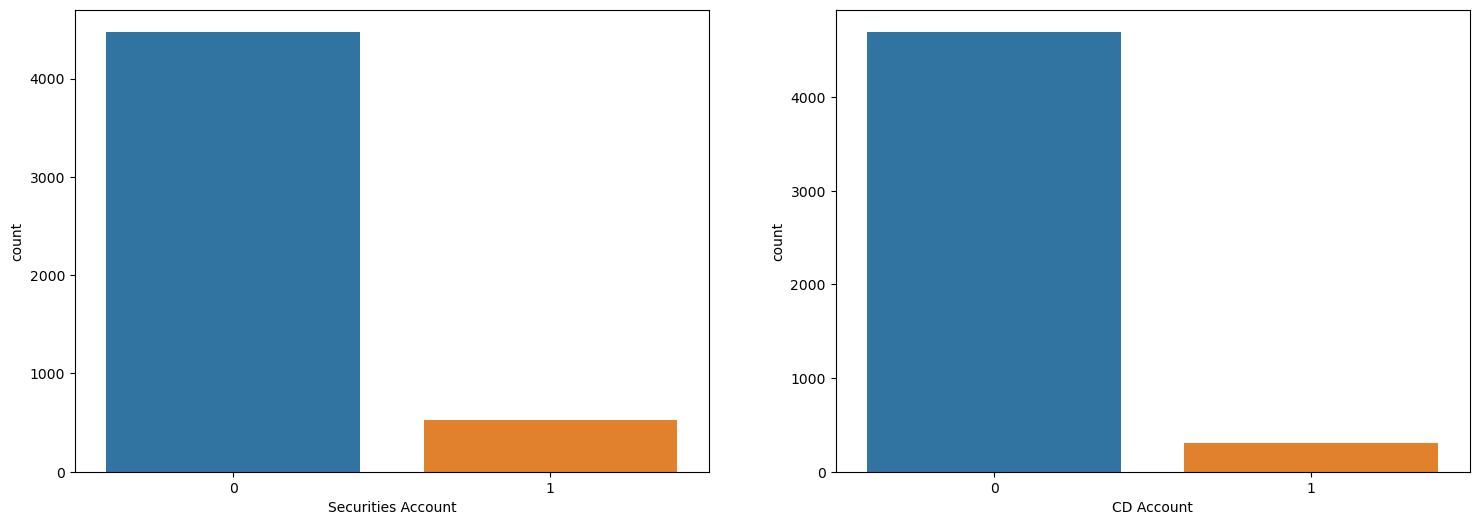

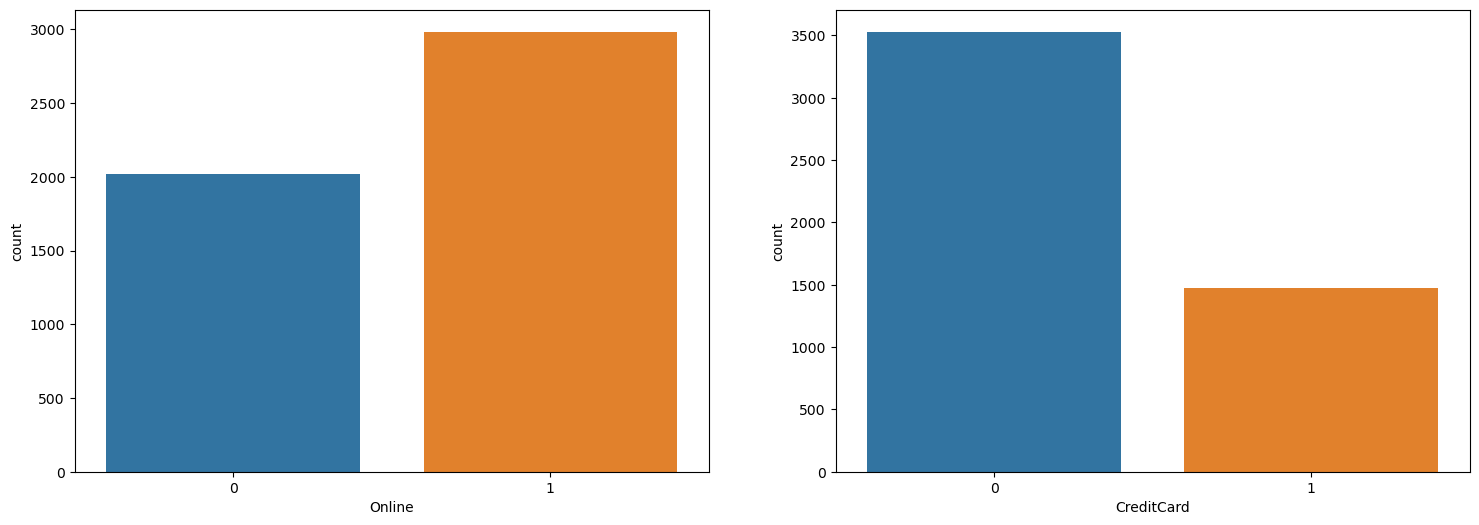

In [24]:
Categorical = ['Family','Education','Securities Account','CD Account', 'Online', 'CreditCard']
i = 0
while i <6:
    fig = plt.figure(figsize=(18, 6))
    plt.subplot(1,2,1)
    sns.countplot(x =Categorical [i], data= Df)
    i = i+1
    plt.subplot(1,2,2)
    sns.countplot(x =Categorical [i], data= Df)
    i = i +1
    plt.show()

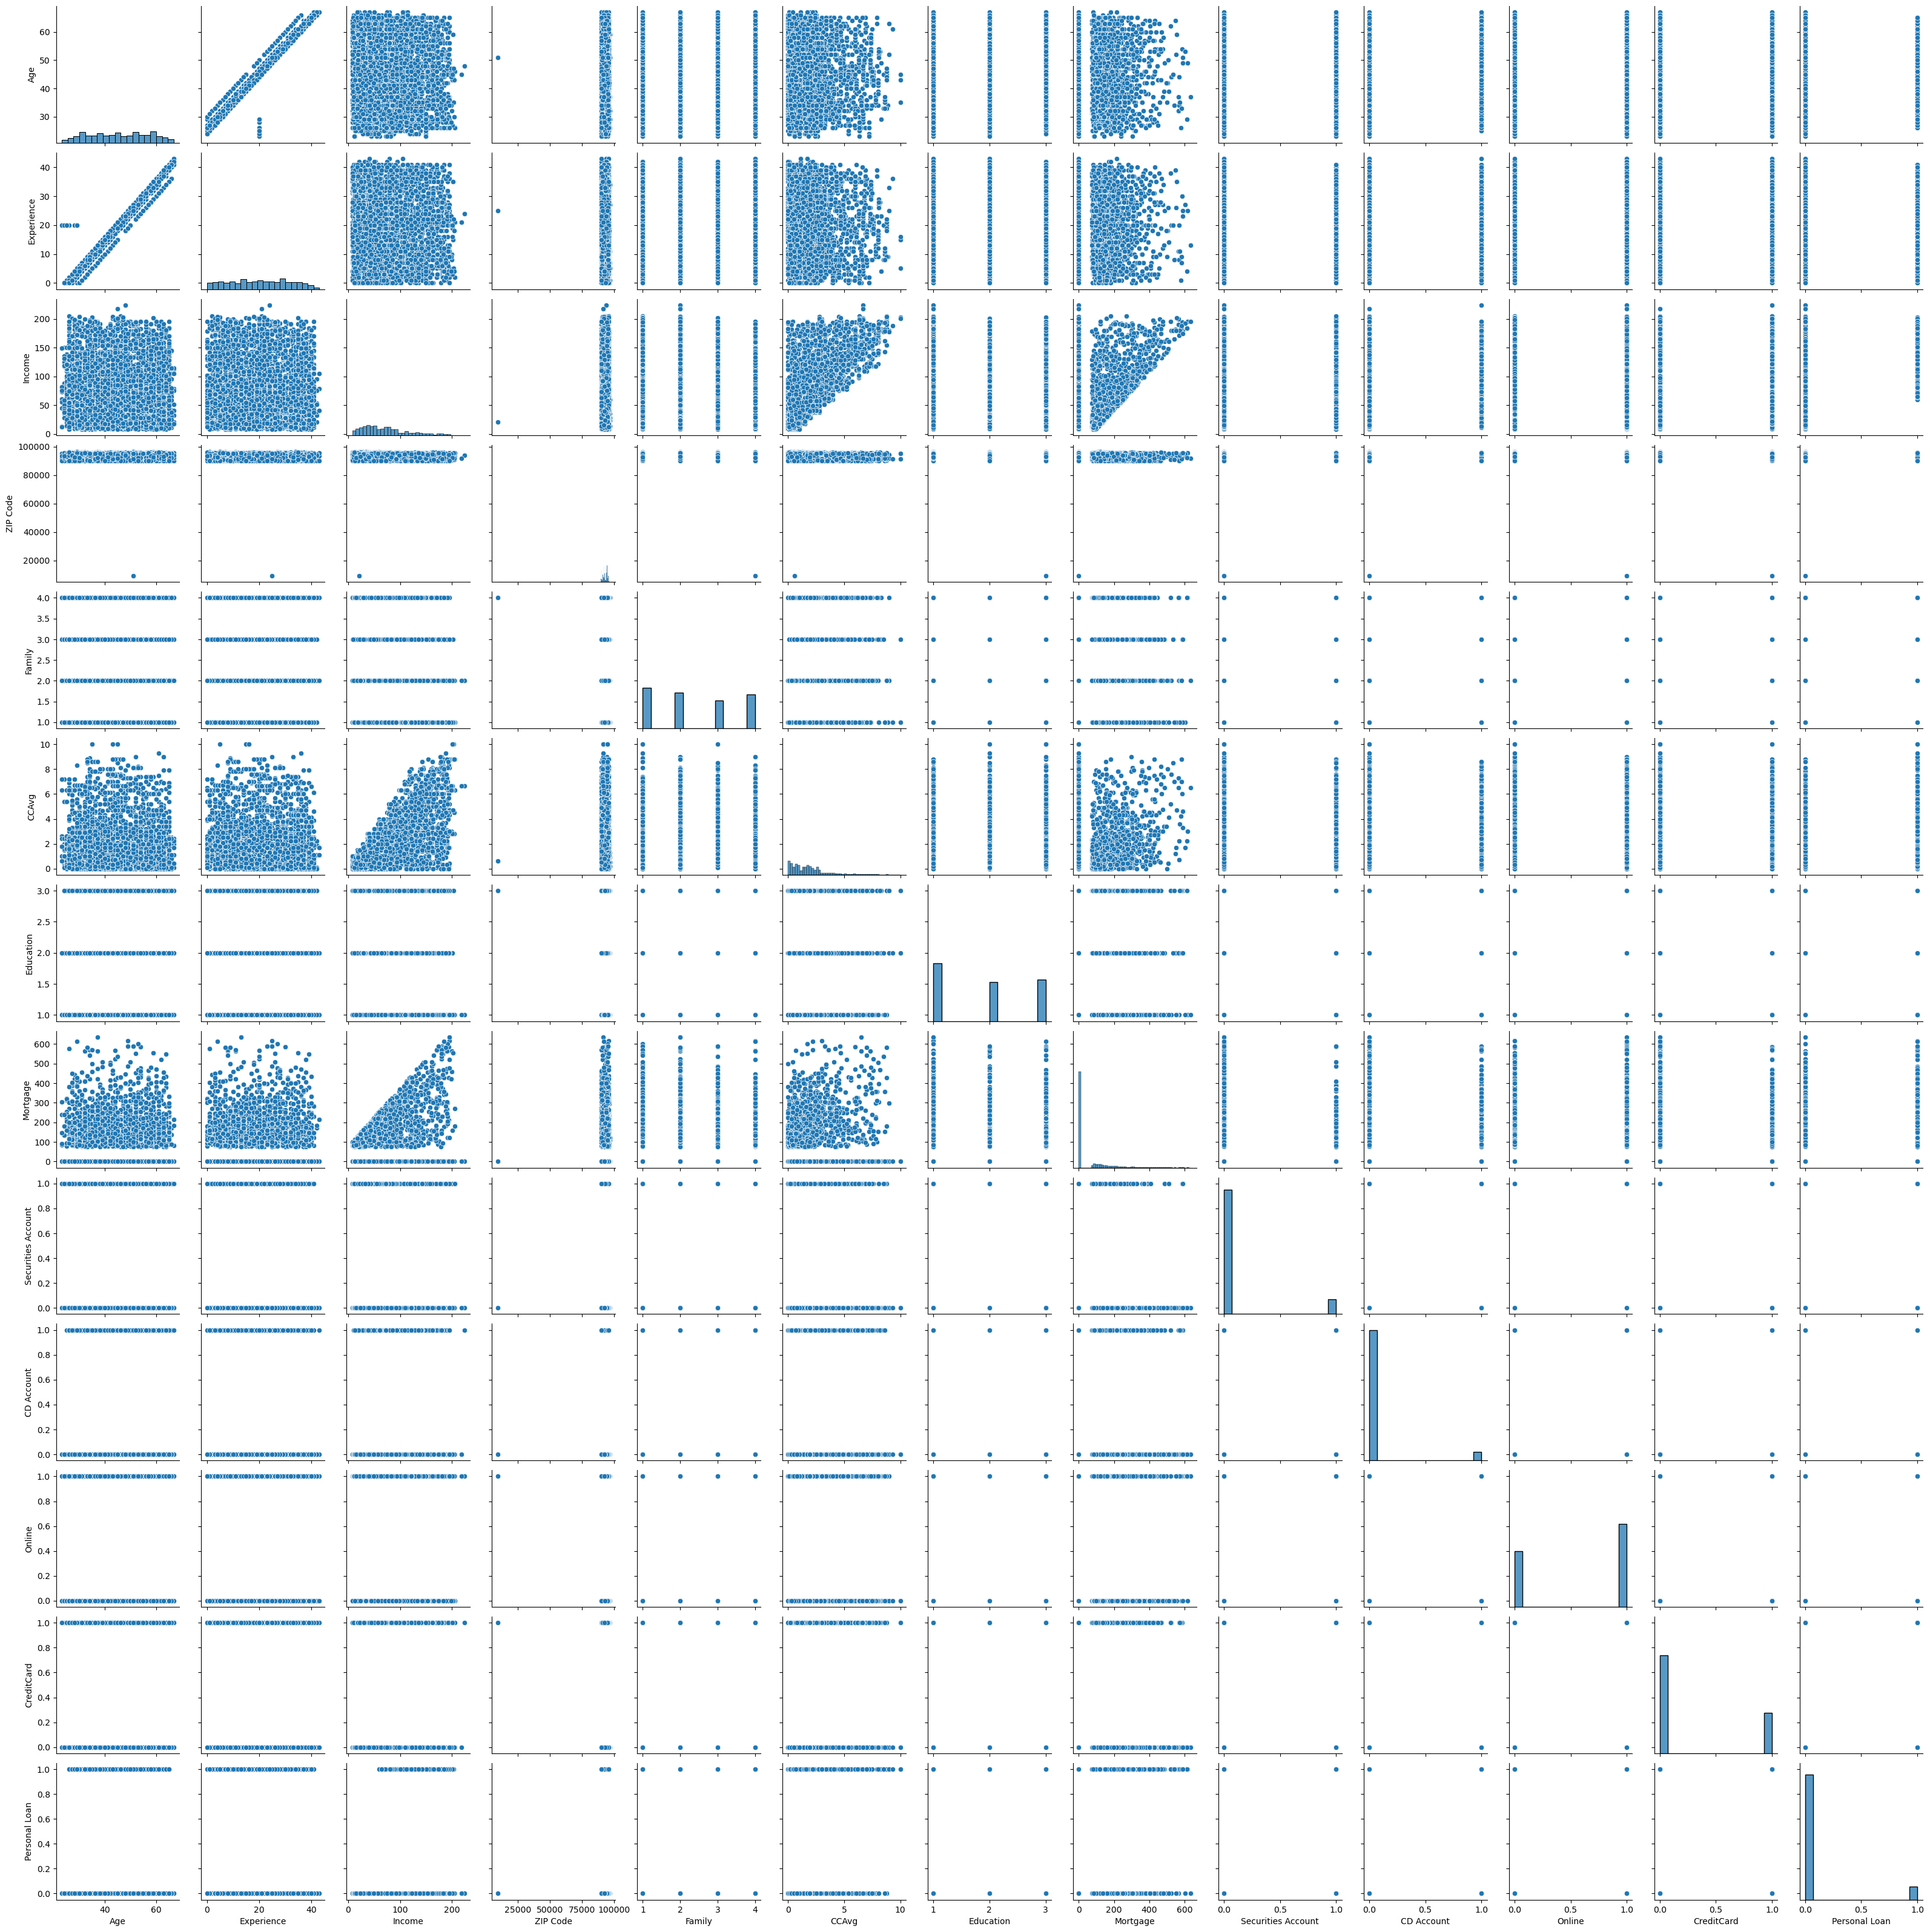

In [25]:
sns.pairplot(Df.iloc[:,1:])

In [26]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
 13  Personal Loan       5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [27]:
Df["Personal Loan"].value_counts().to_frame()


,count
Personal Loan,
0,4520
1,480


<Axes: xlabel='Personal Loan'>

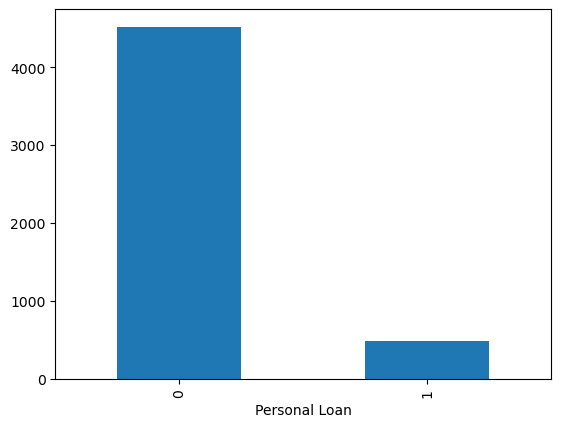

In [28]:
pd.value_counts(Df["Personal Loan"]).plot(kind="bar")


In [21]:
Df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0,0


cross tabulation can be given as :  
 Personal Loan     0    1
Education               
1              2003   93
2              1221  182
3              1296  205
cross tabulation can be given in percentage as :  
 Personal Loan         0         1
Education                        
1              0.955630  0.044370
2              0.870278  0.129722
3              0.863424  0.136576


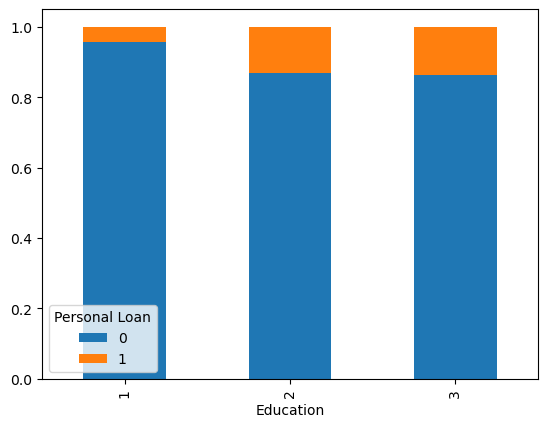

In [29]:

#bivariant analyssis
education = pd.crosstab(Df['Education'],Df['Personal Loan'])
education.div(education.sum(1).astype(float),axis =0).plot(kind='bar',stacked=True)
print('cross tabulation can be given as : ', '\n', education)
print('cross tabulation can be given in percentage as : ', '\n', education.div(education.sum(1).astype(float),axis =0))

cross tabulation can be given as :  
 Personal Loan     0    1
Family                  
1              1365  107
2              1190  106
3               877  133
4              1088  134
cross tabulation can be given in percentage as :  
 Personal Loan         0         1
Family                           
1              0.927310  0.072690
2              0.918210  0.081790
3              0.868317  0.131683
4              0.890344  0.109656


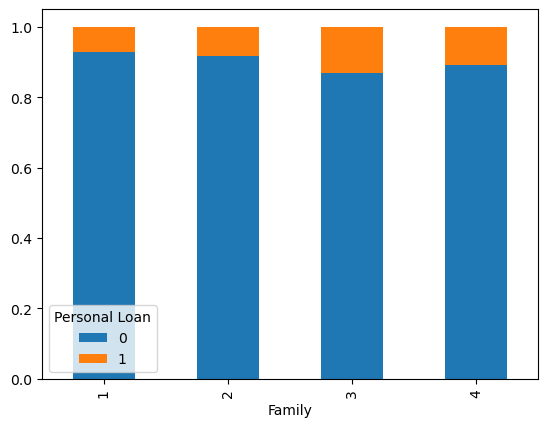

In [30]:
Family = pd.crosstab(Df['Family'],Df['Personal Loan'])
Family.div(Family.sum(1).astype(float),axis =0).plot(kind='bar',stacked=True)
print('cross tabulation can be given as : ', '\n', Family)
print('cross tabulation can be given in percentage as : ', '\n', Family.div(Family.sum(1).astype(float),axis =0))

In [31]:
#sns.countplot(x='Family',data=Df,hue='Personal Loan',palette='Set1')

cross tabulation can be given as :  
 Personal Loan          0    1
Securities Account           
0                   4058  420
1                    462   60
cross tabulation can be given in percentage as :  
 Personal Loan        0         1
0                  NaN       NaN
1              0.22042  0.028626
2                  NaN       NaN
3                  NaN       NaN


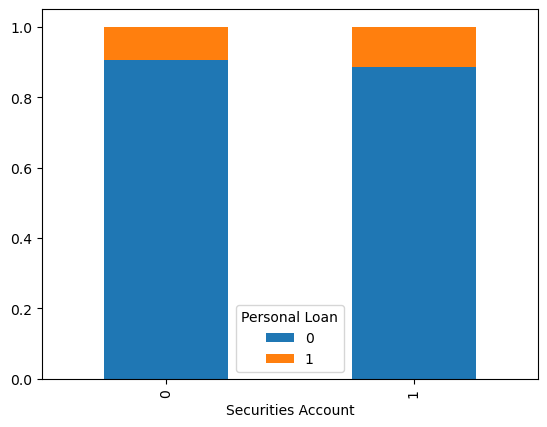

In [32]:
Securities_Account = pd.crosstab(Df['Securities Account'],Df['Personal Loan'])
Securities_Account.div(Securities_Account.sum(1).astype(float),axis =0).plot(kind='bar',stacked=True)
print('cross tabulation can be given as : ', '\n', Securities_Account)
print('cross tabulation can be given in percentage as : ', '\n', Securities_Account.div(education.sum(1).astype(float),axis =0))

cross tabulation can be given as :  
 Personal Loan     0    1
CD Account              
0              4358  340
1               162  140
cross tabulation can be given in percentage as :  
 Personal Loan         0         1
CD Account                       
0              0.927629  0.072371
1              0.536424  0.463576


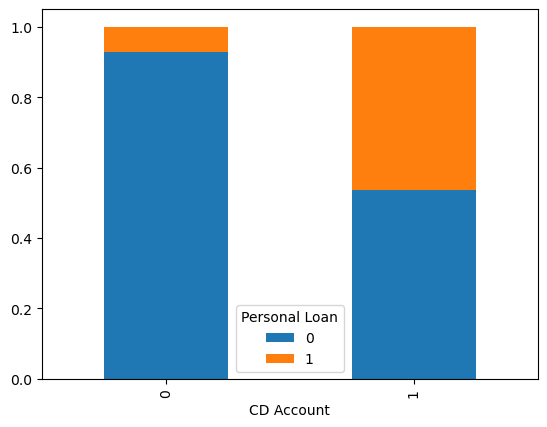

In [33]:
CD_Account = pd.crosstab(Df['CD Account'],Df['Personal Loan'])
CD_Account.div(CD_Account.sum(1).astype(float),axis =0).plot(kind='bar',stacked=True)
print('cross tabulation can be given as : ', '\n', CD_Account)
print('cross tabulation can be given in percentage as : ', '\n', CD_Account.div(CD_Account.sum(1).astype(float),axis =0))

cross tabulation can be given as :  
 Personal Loan     0    1
Online                  
0              1827  189
1              2693  291
cross tabulation can be given in percentage as :  
 Personal Loan        0        1
Online                         
0              0.90625  0.09375
1              0.90248  0.09752


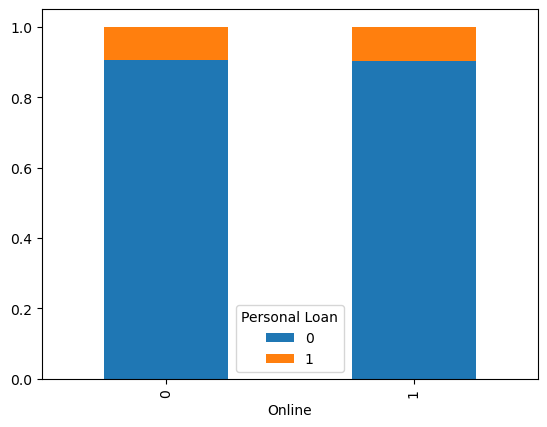

In [34]:
Online = pd.crosstab(Df['Online'],Df['Personal Loan'])
Online.div(Online.sum(1).astype(float),axis =0).plot(kind='bar',stacked=True)
print('cross tabulation can be given as : ', '\n', Online)
print('cross tabulation can be given in percentage as : ', '\n', Online.div(Online.sum(1).astype(float),axis =0))

cross tabulation can be given as :  
 Personal Loan     0    1
CreditCard              
0              3193  337
1              1327  143
cross tabulation can be given in percentage as :  
 Personal Loan         0         1
CreditCard                       
0              0.904533  0.095467
1              0.902721  0.097279


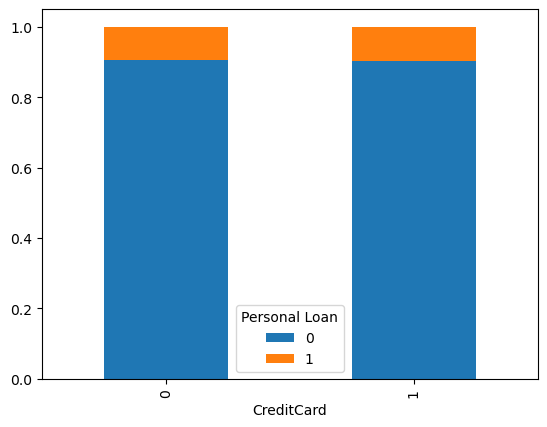

In [28]:
CreditCard = pd.crosstab(Df['CreditCard'],Df['Personal Loan'])
CreditCard.div(CreditCard.sum(1).astype(float),axis =0).plot(kind='bar',stacked=True)
print('cross tabulation can be given as : ', '\n', CreditCard)
print('cross tabulation can be given in percentage as : ', '\n', CreditCard.div(CreditCard.sum(1).astype(float),axis =0))

<Axes: xlabel='Education', ylabel='Mortgage'>

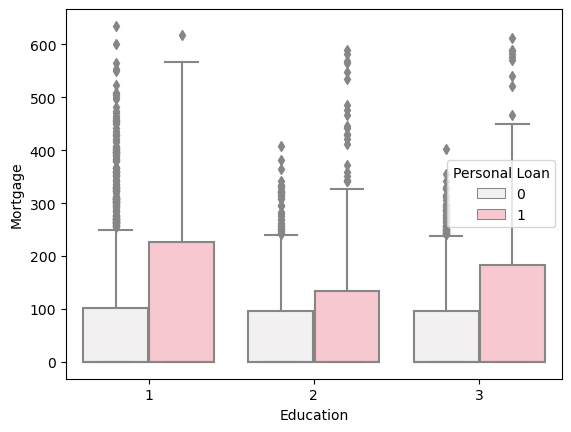

In [36]:

#multivariant analysis
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=Df,color='pink')

<Axes: xlabel='Education', ylabel='Income'>

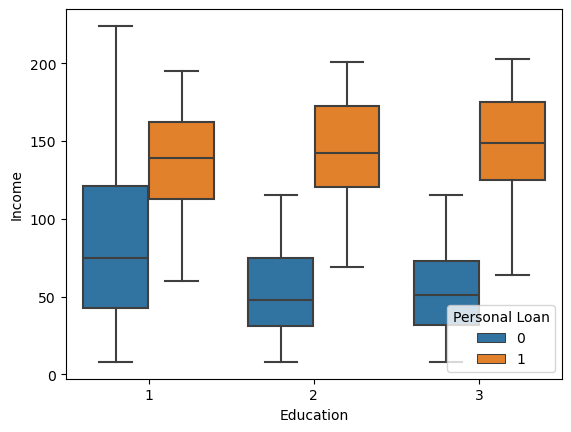

In [37]:
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=Df)

<Axes: xlabel='Family', ylabel='Income'>

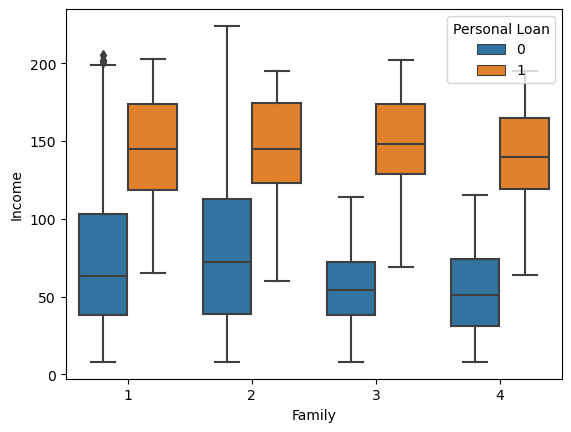

In [38]:
sns.boxplot(x='Family',y='Income',hue='Personal Loan',data=Df)

<Axes: xlabel='Age', ylabel='Income'>

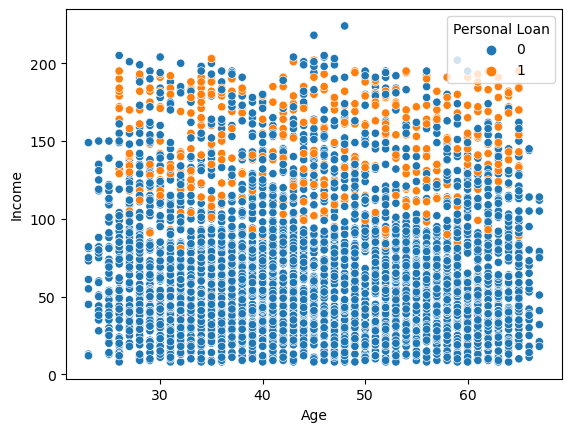

In [39]:
sns.scatterplot(y = 'Income', x = 'Age', data = Df, hue = 'Personal Loan')

<Axes: xlabel='Age', ylabel='Experience'>

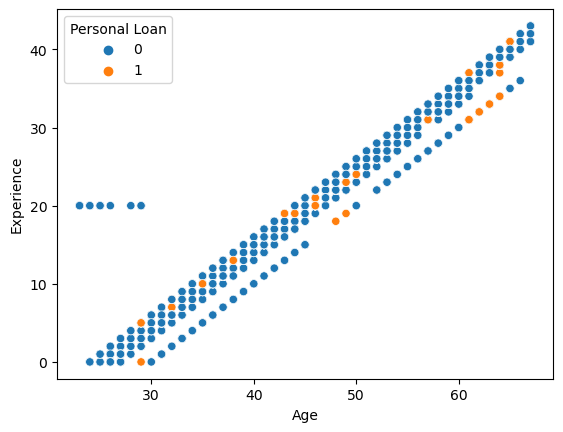

In [40]:
sns.scatterplot(y = 'Experience', x = 'Age', data = Df, hue = 'Personal Loan')

<Axes: xlabel='Age', ylabel='Mortgage'>

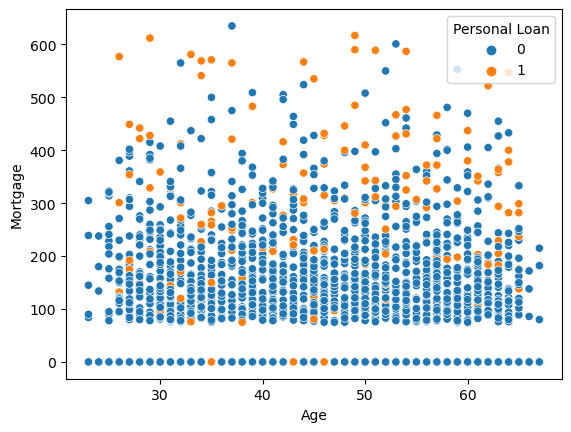

In [41]:
sns.scatterplot(y = 'Mortgage', x = 'Age', data = Df, hue = 'Personal Loan')

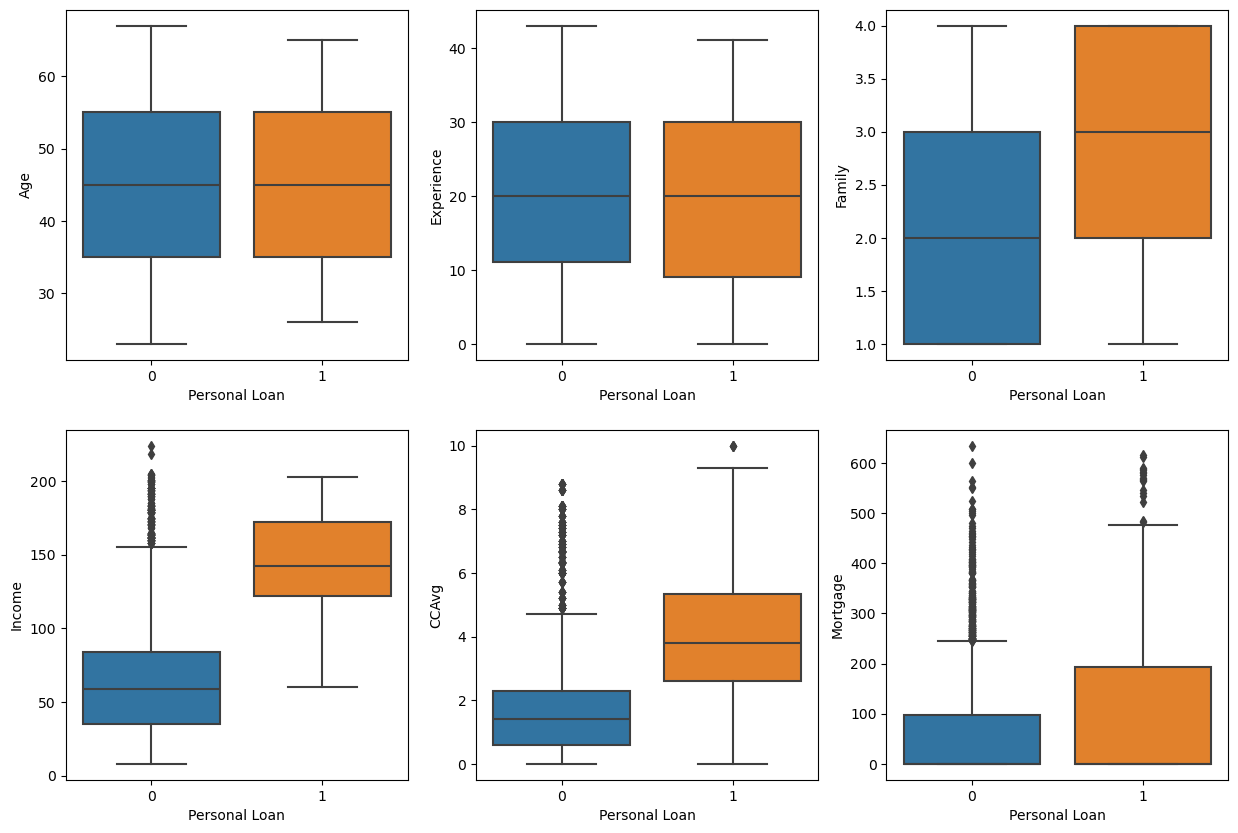

<Figure size 640x480 with 0 Axes>

In [42]:
numerical_1 = ['Age' , 'Experience' ,'Family' ,'Income' , 'CCAvg' , 'Mortgage']
fig, ax_1 = plt.subplots(2, 3, figsize=(15, 10))
for var_1, subplot in zip(numerical_1, ax_1.flatten()):
    sns.boxplot(x='Personal Loan', y=var_1, data=Df, ax=subplot)
plt.show()
plt.clf()

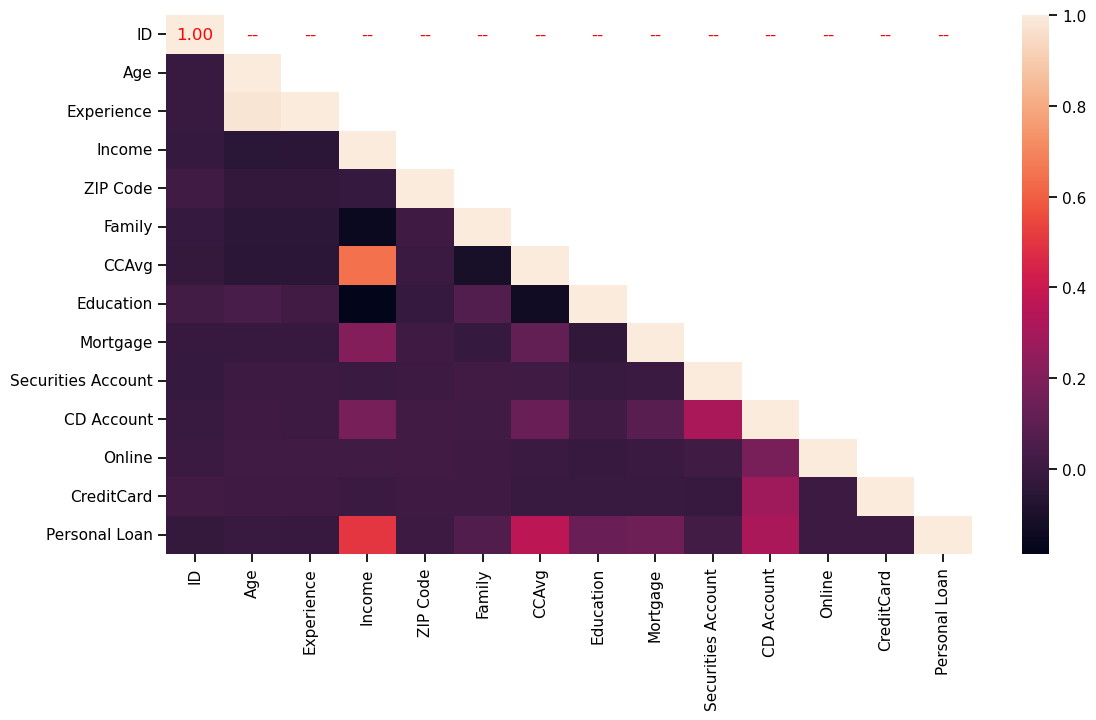

In [43]:
# Correlation with heat map
corr_overall = Df.corr()

sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5, 'text.color': 'white'})

#sns.set_context("notebook", font_scale=1.0,  rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr_overall)
mask[np.triu_indices_from(mask, 1)] = True
a= sns.heatmap(corr_overall, mask=mask, annot=True, fmt='.2f', annot_kws={"color": "red"})
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=0)

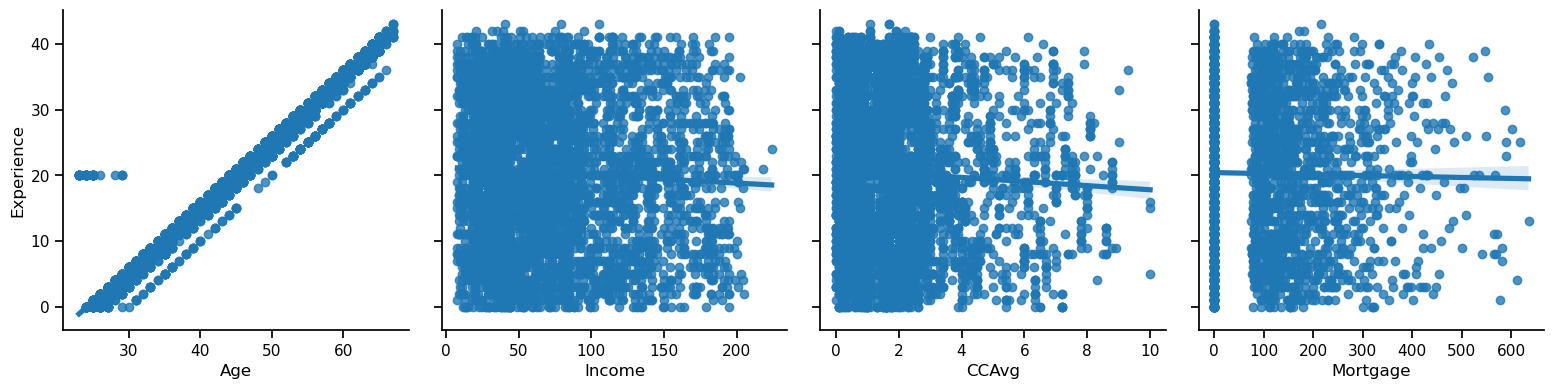

In [44]:
ncol_2 = ['Age', 'Income','CCAvg', 'Mortgage']
grid = sns.PairGrid(Df, y_vars = 'Experience', x_vars = ncol_2, height = 4)
grid.map(sns.regplot);

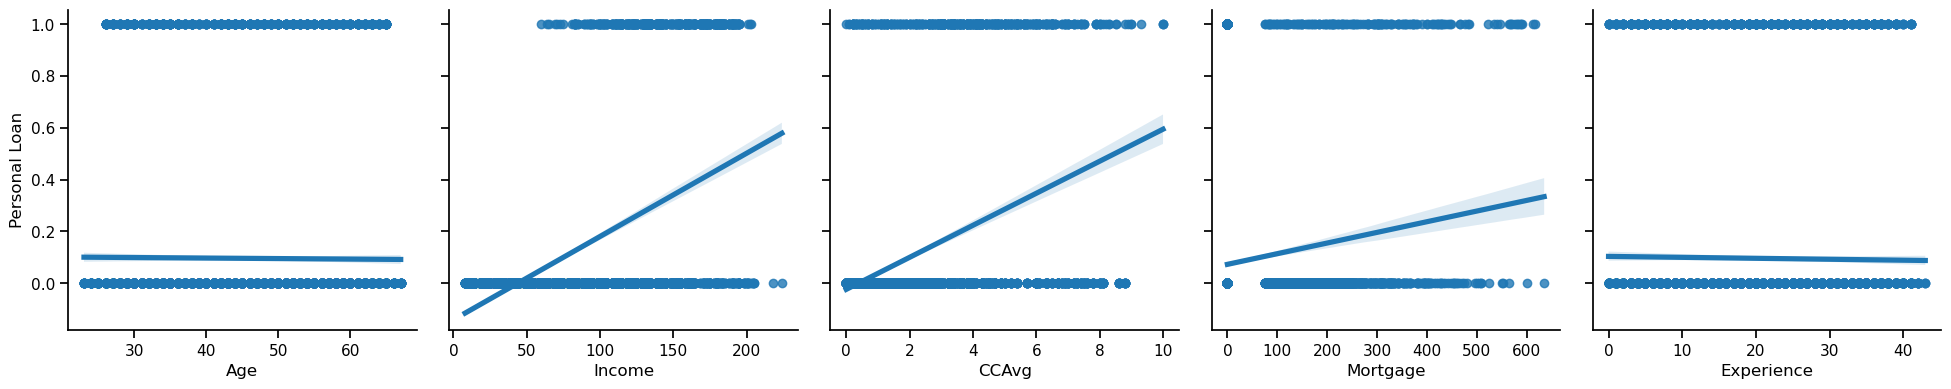

In [45]:
ncol_2 = ['Age', 'Income','CCAvg', 'Mortgage', 'Experience']
grid = sns.PairGrid(Df, y_vars = 'Personal Loan', x_vars = ncol_2, height = 4)
grid.map(sns.regplot);

<Axes: >

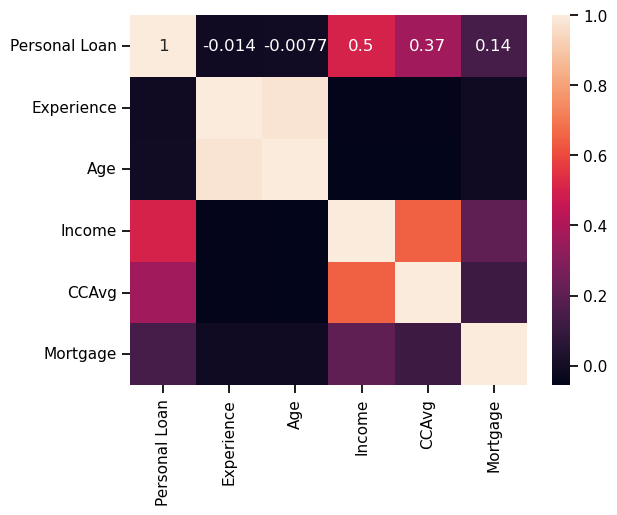

In [46]:
sns.heatmap(Df[['Personal Loan','Experience' ,'Age', 'Income', 'CCAvg', 'Mortgage']].corr(), annot = True)

In [47]:
Df[['Personal Loan', 'Experience','Age', 'Income', 'CCAvg', 'Mortgage']].corr()

,Personal Loan,Experience,Age,Income,CCAvg,Mortgage
Personal Loan,1.000000,-0.014013,-0.007726,0.502462,0.366889,0.142095
Experience,-0.014013,1.000000,0.977182,-0.049046,-0.048718,-0.013365
Age,-0.007726,0.977182,1.000000,-0.055269,-0.052012,-0.012539
Income,0.502462,-0.049046,-0.055269,1.000000,0.645984,0.206806
CCAvg,0.366889,-0.048718,-0.052012,0.645984,1.000000,0.109905
Mortgage,0.142095,-0.013365,-0.012539,0.206806,0.109905,1.000000


In [48]:
Df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0,0


In [49]:
#######################defining Model
#######################defining X, Y
X = Df.drop ('Personal Loan', axis=1).values
Y = Df['Personal Loan'].values.reshape (-1,1)
#######################defining Train and test sets
X_train, X_test, Y_train, Y_test = train_test_split (X,Y, test_size=0.3 , random_state=0)
print ( 'X-Train Shape :' ,X_train.shape)
print ( 'X-Test Shape :' ,X_test.shape)
print ( 'Y-Train Shape :' ,Y_train.shape)
print ( 'Y-Test Shape :' ,Y_test.shape)


X-Train Shape : (3500, 13)
X-Test Shape : (1500, 13)
Y-Train Shape : (3500, 1)
Y-Test Shape : (1500, 1)


In [50]:
######Defining a Model
from sklearn.metrics import classification_report, confusion_matrix
LogRegressor =LogisticRegression (solver = 'liblinear')
LogRegressor.fit(X_train, Y_train)


LogisticRegression(solver='liblinear')

In [51]:
LogRegressor.classes_

array([0, 1], dtype=int64)

In [52]:
Y_pred = LogRegressor.predict(X_test)
predictProb = LogRegressor.predict_proba(X_test)

In [53]:
confusion_matrix (Y , LogRegressor.predict(X))

array([[4380,  140],
       [ 316,  164]], dtype=int64)

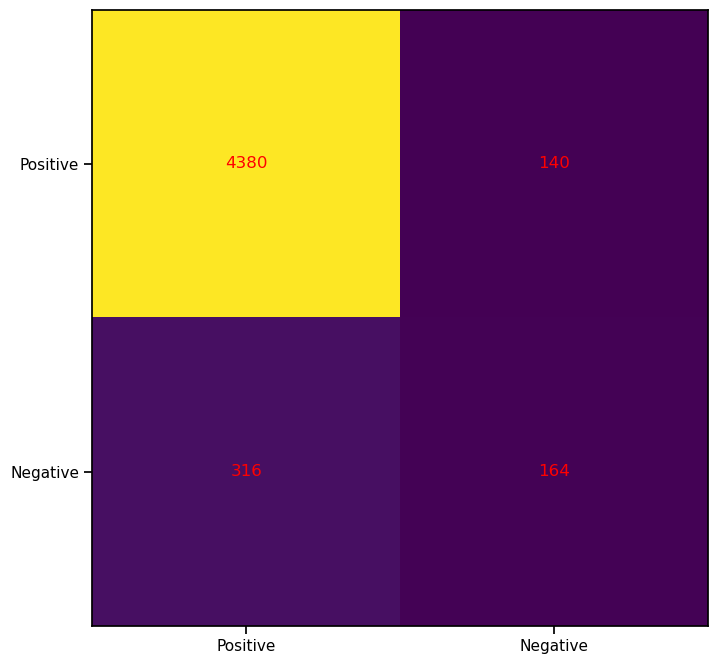

In [54]:
# Confusion Matrix

cm= confusion_matrix (Y , LogRegressor.predict(X))
fig, ax = plt.subplots(figsize =( 8,8))
ax.imshow(cm)
ax.grid = False
ax.xaxis.set(ticks=(0,1) , ticklabels= ('Positive', 'Negative'))
ax.yaxis.set(ticks=(0,1) , ticklabels= ('Positive', 'Negative'))
ax.set_ylim (1.5, -0.5)
for i in range (2):
    for j in range (2):
        ax.text(j, i, cm[i,j], ha = 'center', va= 'center', color = 'red')

plt.show()



In [55]:
print ("Accurancy: of Logistic regression Model:" , metrics.accuracy_score(Y_test, Y_pred),'\n')

print (classification_report(Y, LogRegressor.predict(X)),'\n')


print ('LogRegressor.coef: ', LogRegressor.coef_,'\n')

print ('LogRegressor.intercept: ', LogRegressor.intercept_,'\n')

print ('LogRegressor.score (X, Y) of Logistic regression Model: ', LogRegressor.score (X, Y))



Accurancy: of Logistic regression Model: 0.9186666666666666 

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      4520
           1       0.54      0.34      0.42       480

    accuracy                           0.91      5000
   macro avg       0.74      0.66      0.68      5000
weighted avg       0.89      0.91      0.90      5000
 

LogRegressor.coef:  [[-4.16902558e-05  5.76313140e-03 -7.23845078e-04  3.60250537e-02
  -6.67171499e-05  1.20132693e-02  5.49610070e-03  1.41465965e-02
   8.99933006e-04  9.64503652e-04  3.84897367e-03 -5.13926005e-04
   1.09829946e-05]] 

LogRegressor.intercept:  [-4.44569841e-05] 

LogRegressor.score (X, Y) of Logistic regression Model:  0.9088


In [56]:
Df1= Df

In [57]:
#######################defining Model ####Gaussian
#######################defining X, Y
X = Df.drop ('Personal Loan', axis=1).values
Y = Df['Personal Loan'].values.reshape (-1,1)
#######################defining Train and test sets
X_train, X_test, Y_train, Y_test = train_test_split (X,Y, test_size=0.3 , random_state=0)
print ( 'X-Train Shape :' ,X_train.shape)
print ( 'X-Test Shape :' ,X_test.shape)
print ( 'Y-Train Shape :' ,Y_train.shape)
print ( 'Y-Test Shape :' ,Y_test.shape)
######Defining a Model



X-Train Shape : (3500, 13)
X-Test Shape : (1500, 13)
Y-Train Shape : (3500, 1)
Y-Test Shape : (1500, 1)


In [58]:
######Defining a Model ####Gaussian
Classifier = GaussianNB()
Classifier.fit(X_train , Y_train)
Y_pred = Classifier.predict(X_test)

In [59]:
from sklearn.metrics import classification_report, confusion_matrix
Classifier.classes_

array([0, 1], dtype=int64)

In [60]:
confusion_matrix (Y , Classifier.predict(X))

array([[4154,  366],
       [ 198,  282]], dtype=int64)

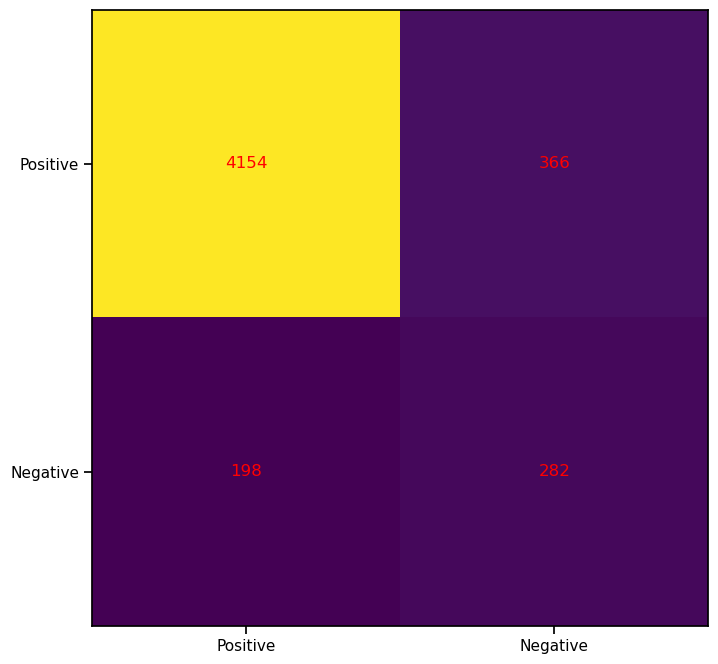

In [61]:

cm1= confusion_matrix (Y , Classifier.predict(X))
fig, ax = plt.subplots(figsize =( 8,8))
ax.imshow(cm1)
ax.grid = False
ax.xaxis.set(ticks=(0,1) , ticklabels= ('Positive', 'Negative'))
ax.yaxis.set(ticks=(0,1) , ticklabels= ('Positive', 'Negative'))

ax.set_ylim (1.5, -0.5)
for i in range (2):
    for j in range (2):
        ax.text(j, i, cm1[i,j], ha = 'center', va= 'center', color = 'red')

plt.show()


In [62]:
print ("Accurancy of Guassian Model: " , metrics.accuracy_score(Y_test, Y_pred),'\n')

print (classification_report(Y, Classifier.predict(X)),'\n')


print ('Classifier.score (X, Y) of Guassian Model:: ', Classifier.score (X, Y))



Accurancy of Guassian Model:  0.888 

              precision    recall  f1-score   support

           0       0.95      0.92      0.94      4520
           1       0.44      0.59      0.50       480

    accuracy                           0.89      5000
   macro avg       0.69      0.75      0.72      5000
weighted avg       0.90      0.89      0.89      5000
 

Classifier.score (X, Y) of Guassian Model::  0.8872


In [63]:
Df2=Df

In [64]:
#######################defining Model KNN
#######################defining X, Y
X = Df.drop ('Personal Loan', axis=1).values
Y = Df['Personal Loan'].values.reshape (-1,1)
#######################defining Train and test sets
X_train, X_test, Y_train, Y_test = train_test_split (X,Y, test_size=0.3 , random_state=0)
print ( 'X-Train Shape :' ,X_train.shape)
print ( 'X-Test Shape :' ,X_test.shape)
print ( 'Y-Train Shape :' ,Y_train.shape)
print ( 'Y-Test Shape :' ,Y_test.shape)
######Defining a Model



X-Train Shape : (3500, 13)
X-Test Shape : (1500, 13)
Y-Train Shape : (3500, 1)
Y-Test Shape : (1500, 1)


In [65]:
#finding best k for knn
K = 20
Acc = np.zeros(K)
for i in range (1, K+1):
    clf= KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train , Y_train.ravel())
    Y_pred = clf.predict (X_test)
    Acc[i-1] = metrics.accuracy_score(Y_test, Y_pred)
Acc

array([0.898     , 0.91333333, 0.90866667, 0.914     , 0.91466667,
       0.91533333, 0.916     , 0.91533333, 0.91533333, 0.91533333,
       0.91533333, 0.91466667, 0.91466667, 0.91466667, 0.91466667,
       0.91466667, 0.91466667, 0.91466667, 0.91466667, 0.91466667])

In [66]:
print (np.max(Acc))
print (np.min(Acc))

0.916
0.898


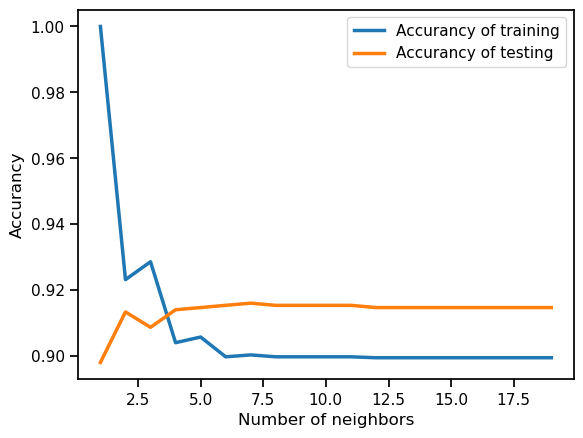

In [67]:
###ANother way to find the best k for knn

Trainig_Acc = []
Testing_Acc= []
#try KNN for different K nearest neighbor from 1 to 15
neighbors_setting = range (1,20)
for n_neighbors in neighbors_setting:
    KNN= KNeighborsClassifier(n_neighbors= n_neighbors)
    KNN.fit (X_train, Y_train.ravel())
    Trainig_Acc.append(KNN.score(X_train, Y_train))
    Testing_Acc.append(KNN.score(X_test, Y_test))
    
    
plt.plot (neighbors_setting, Trainig_Acc, label = 'Accurancy of training')
plt.plot (neighbors_setting, Testing_Acc, label = 'Accurancy of testing')
plt.ylabel ('Accurancy')
plt.xlabel('Number of neighbors')
#plt.grid()
plt.legend()
plt.show()

In [68]:
# best way for Model improvement fingin best K
from sklearn.model_selection import GridSearchCV

parameters = {'n_neighbors': range(1, 50)}
Grid_KN = GridSearchCV(estimator=KNN,
                       param_grid=parameters, scoring='accuracy', cv=5, verbose=1, n_jobs=1)
Grid_KN.fit(X_train, Y_train.ravel())


Fitting 5 folds for each of 49 candidates, totalling 245 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=19), n_jobs=1,
             param_grid={'n_neighbors': range(1, 50)}, scoring='accuracy',
             verbose=1)

In [69]:
# best way for Model improvement fingin best K

Grid_KN.best_params_

{'n_neighbors': 7}

In [70]:
######Defining a Model for the best k which is equal to 7 based on finding K
k = 7
####KNeighborsClassifier
Classifier = KNeighborsClassifier(k)
Classifier.fit(X_train , Y_train.ravel())
Y_pred = Classifier.predict(X_test)


In [71]:
print ("Accurancy: of KNN Model with K= 7" , metrics.accuracy_score(Y_test, Y_pred),'\n')
print (classification_report(Y, Classifier.predict(X)))


Accurancy: of KNN Model with K= 7 0.916 

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      4520
           1       0.73      0.02      0.03       480

    accuracy                           0.91      5000
   macro avg       0.82      0.51      0.49      5000
weighted avg       0.89      0.91      0.86      5000



In [72]:
confusion_matrix (Y , Classifier.predict(X))


array([[4517,    3],
       [ 472,    8]], dtype=int64)

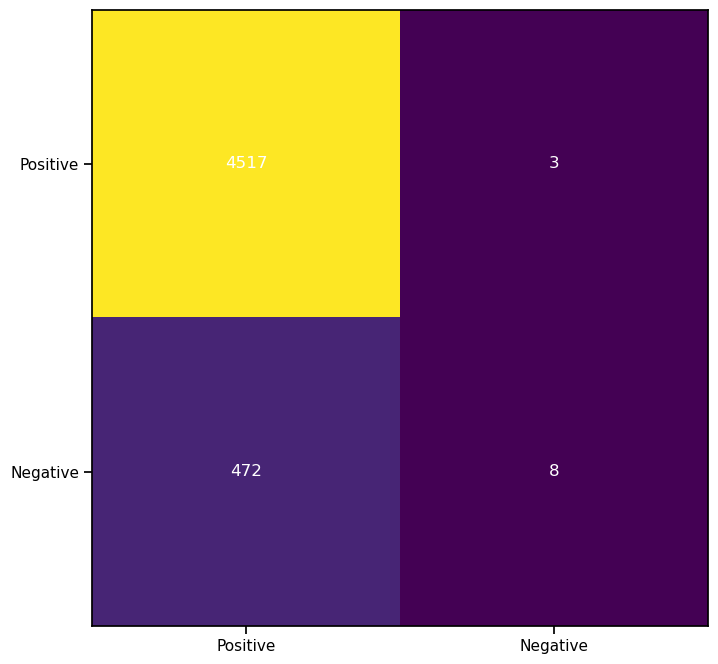

In [73]:

cm2= confusion_matrix (Y , Classifier.predict(X))
fig, ax = plt.subplots(figsize =( 8,8))
ax.imshow(cm2)
ax.grid = False
ax.xaxis.set(ticks=(0,1) , ticklabels= ('Positive', 'Negative'))
ax.yaxis.set(ticks=(0,1) , ticklabels= ('Positive', 'Negative'))
ax.set_ylim (1.5, -0.5)
for i in range (2):
    for j in range (2):
        ax.text(j, i, cm2[i,j], ha = 'center', va= 'center', color = 'white')

plt.show()


KNN: 0.900000 (0.015388)
LR: 0.912800 (0.010889)
NB: 0.886800 (0.010703)


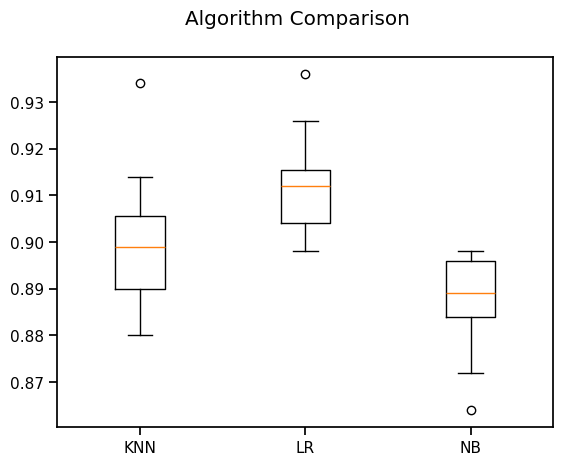

In [75]:
#this code define which model can be the best for our data set -serach by me


from sklearn import model_selection

models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('NB', GaussianNB()))


# Evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, shuffle=False)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# Boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [76]:
Df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0,0


In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the  dataset for LR
X = Df.drop ('Personal Loan', axis=1).values
Y = Df['Personal Loan'].values.reshape (-1,1)
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, Y_train)

# Make predictions on the testing data
Y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.913


In [81]:
# Define the hyperparameters to tune the Logistic Regression searched by me
param_grid = {'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(LogRegressor, param_grid, cv=5)
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f'Best hyperparameters: {best_params}')

# Make predictions using the best estimator
LogRegressor_op = grid_search.best_estimator_
Y_pred = LogRegressor_op.predict(X_test)

# Calculate the accuracy of the best classifier
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy with best hyperparameters of Logestic Regression: {accuracy}')

print (classification_report(Y, LogRegressor_op.predict(X)),'\n')
print ('Logestic regression Optimization.score (X, Y) of Model:', LogRegressor_op.score(X, Y))
print ("Accuracy of optimized Logestic regression:", metrics.accuracy_score(Y_test, Y_pred),'\n')


Best hyperparameters: {'C': 100, 'penalty': 'l1'}
Accuracy with best hyperparameters of Logestic Regression: 0.954
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      4520
           1       0.82      0.63      0.71       480

    accuracy                           0.95      5000
   macro avg       0.89      0.81      0.84      5000
weighted avg       0.95      0.95      0.95      5000
 

Logestic regression Optimization.score (X, Y) of Model: 0.951
Accuracy of optimized Logestic regression: 0.954 

